# 作業:  
本週我們進行多文本的分析，重點放在文章的潛在語意。字詞在各篇文章出現的頻率，構成字詞矩陣。經過降維，可以抽離出一些概念，這些概念由一組字詞所構成，各字詞的貢獻度不一。此即潛在語意分析或稱topic models。各篇文章在概念所構成的空間的投影，可作為文章分類的依靠。
本週介紹 LSI 亦稱潛在語意分析。請記住電腦是依人的指令來工作的，因此研究者的創意永遠是最重要的。
本週作業：以你們的文本進行分析!兩個重點，是否可以找到一些概念？最接近的字詞？


In [18]:
from __future__ import print_function
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import Normalizer
from sklearn import metrics
from sklearn.cluster import KMeans, MiniBatchKMeans
import pandas as pd
import numpy
import numpy as np
import matplotlib.pyplot as plt
import os
import io
import re

In [2]:
path="C:/Python/"

In [3]:
df=pd.read_excel(path+'天成飯店評論斷詞.xlsx')
df

,Unnamed: 0,Title,Reviews,token,Rating,Place,Total_Post,Vote,Date_of_Stay
0,0,很讚,謝謝天成大飯店的全體同仁，因為你們的努力，才有那麼好的住宿體驗！地點方便、服務人員又專業且體...,謝謝 天成 大飯店 的 全體同仁 因為 你們 的 努力 才 有 那麼 好 的 住宿 體驗 地...,50,no_place,1 篇投稿,no_helpful,2019年10月
1,1,地點方便,地點離捷運站近，要去台北景點都方便服務人員熱心，有問題也都能即時解答房間乾淨明亮，設備俱全，...,地點 離 捷運 站 近 要 去 台北 景點 都 方便 服務 人員 熱心 有 問題 也 都 能...,50,no_place,1 篇投稿,no_helpful,2019年10月
2,2,服務人員態度超好,離火車站、捷運很近櫃檯人員都很親切的幫忙解決問題一個人出來住到這裡真是太好了有機會一定會再來...,離 火車站 捷運 很近 櫃檯 人員 都 很 親切 的 幫忙 解決問題 一個 人 出來 住 到...,50,no_place,3 篇投稿,no_helpful,2019年10月
3,3,推薦大家一家好飯店！,飯店到台北車站（火車、捷運、高鐵）非常便利，只要到台北出差都會選擇天成大飯店。 這是為什麼...,飯店 到 台北 車站 火車 捷運 高鐵 非常 便利 只要 到 台北 出差 都 會 選擇 天成...,50,台灣台北,10 篇投稿,no_helpful,2019年10月
4,4,休息一下,在臺北過夜一宿，環境舒適，服務人員相當棒，可以為您服務，住在這裏很方便，搭配捷運線想去哪都很...,在 臺北 過夜 一宿 環境 舒適 服務 人員 相當 棒 可以 為 您 服務 住 在 這裏 很...,50,台灣中正區,1 篇投稿,no_helpful,2019年10月
5,5,颱風來襲也不用怕,"天成是台北車站附近的最佳飯店, 不用帶雨傘也可到達車站, 還有便利店在樓下, 完全不用擔心不...","天成 是 台北 車站 附近 的 最佳 飯店 , 不用 帶 雨傘 也 可 到達 車站 , ...",40,香港,532 篇投稿,16 人推薦,2019年9月
6,6,一流的台北洒店,這次已經是第二次入住，服務比上次更佳。職員對旅客有賓至如歸的感覺。在填寫房間意見調查後，職員...,這次 已經 是 第二次 入住 服務 比 上次 更佳 職員 對 旅客 有 賓至如歸 的 感覺 ...,50,香港,135 篇投稿,2 人推薦,2019年9月
7,7,飯店很美,整體飯店氣氛很好，對於我的請求都細心的為我處理好了，雖然飯店的歷史長遠，但我想這大概是為什麼...,整體 飯店 氣氛 很 好 對於 我 的 請求 都 細心 的 為 我 處理 好 了 雖然 飯店...,50,no_place,4 篇投稿,2 人推薦,2019年9月
8,8,很不錯的酒店,我們在這家酒店住了4天3晚。我們的房間是初級套房。很寬敞，很乾凈，也很安靜。我們住的很舒服，...,我們 在 這家 酒店 住 了 4 天 3 晚 我們 的 房間 是 初級 套房 很 寬敞 很 ...,40,日本,19 篇投稿,7 人推薦,e
9,9,高於我的預期,這家酒店靠近各大交通站台：列車站，巴士站、火車站。。。等等。酒店住宿還包早餐，早餐高於我的預...,這家 酒店 靠近 各大 交通 站台 ： 列車 站 巴士站 火車站 等等 酒店 住宿 還包 早...,50,no_place,21 篇投稿,13 人推薦,e


In [4]:
# 刪除無值的紀錄
df.token.isnull().value_counts()
df.token=df.token.fillna(999)
delete=df[df.token==999].index.tolist()
print (len(delete))
df=df.drop(delete)
df.index=range(len(df))

0


In [5]:
# 刪除非字串
delete=[]
for n in range(len(df)):
    try:
        if (type(df.token[n])!= str) or (len(df.token)<1):
            delete.append(n)
    except:
        delete.append(n)
print (len(delete))     
df=df.drop(delete)
df.index=range(len(df))

0


In [6]:
# list 分詞校正，去除特殊符號，視需要調整。
new_token=[]
for n in range(len(df)):
    seg_list =df.token[n].split()
    # 去除空白
    seg_list = [i for i in seg_list if i != u'']
    # 去除數字
    seg_list = [w for w in seg_list if not re.search(r"[0123456789]",w)]
    # 去除英文
    seg_list = [w for w in seg_list if not re.search(r"[a-zA-Z]",w)]
    # 去除特殊符號
    seg_list = [w for w in seg_list if not re.search(r'[-，+、@,？{}●►❖★！!：/(=)…（）『』%《》$;；」:?=<>"／.&#"「_【】]',w)]
    # 去除特殊字串
    deletewords=['[',']',"'",'\ufeff']
    seg_list = [w for w in seg_list if w not in deletewords]
    seg=" ".join(seg_list)
    new_token.append(seg)
new_token[1]

'地點 離 捷運 站 近 要 去 台北 景點 都 方便 服務 人員 熱心 有 問題 也 都 能 即時 解答 房間 乾淨 明亮 設備 俱全 很 安靜 舒適'

In [7]:
print(len(new_token))

1485


In [8]:
docs=list(new_token)
docs[99]

'來 台灣 旅遊 幾個 月 前 就 定 了 天成 飯店 交通 非常 便利 台北 車站 旁邊 去 各個 地方 都 很 方便 酒店 服務 很 好 哦 非常 熱情 房間 很 乾 凈 整潔 很 是 滿意 早餐 也 都 非常 好以 後來 台北 還住 這裏 推薦 哦 ⭐ ️ ⭐ ️ ⭐ ️ ⭐ ️ ⭐ ️'

In [9]:
# documents 為 list 元素為 string
num_i=150    # number of concepts
num_t=10    # number of items shown

# 文章字詞矩陣，沒有加權 ****注意單辭被排除在外
#vectorizer = CountVectorizer(min_df = 1,ngram_range= (0,1))  
#count = vectorizer.fit_transform(docs) 

# 或者 tfidf 加權 ****注意單辭被排除在外
vectorizer1 = TfidfVectorizer(min_df = 1,ngram_range= (0,1) )  
tfidf = vectorizer1.fit_transform(docs) 

# 字詞文章矩陣，轉置 **** 注意先轉置
#tdm_count=count.transpose() 
tdm_tfidf=tfidf.transpose() 

# SVD 降維以後的結果 
svd = TruncatedSVD(num_i, algorithm = 'arpack')   # object    

# 各字詞在各維度上的投影，亦即將字詞變成向量
# lsa_count = svd.fit_transform(tdm_count)  # numpy array  
lsa_tfidf = svd.fit_transform(tdm_tfidf)  # numpy array  

# 標準化
# lsa_count_n = Normalizer(copy=False).fit_transform(lsa_count)   
lsa_tfidf_n1 = Normalizer(copy=False).fit_transform(lsa_tfidf)   

# 字詞的 list
terms=vectorizer1.get_feature_names()   

# 降維後所能解釋的變異
v1=svd.explained_variance_
v2=svd.explained_variance_ratio_
v3=svd.explained_variance_ratio_.sum()
print ('能解釋的變異',v1)
print ('能解釋的變異%',v2)
print ('能解釋的變異%總和',v3)

能解釋的變異 [0.00953996 0.00348211 0.00185165 0.0015169  0.00117777 0.00108656
 0.00102258 0.00093872 0.00092604 0.00090741 0.00087099 0.00079446
 0.00076563 0.0007492  0.00073717 0.00070902 0.00068647 0.00068078
 0.00066478 0.00065436 0.0006228  0.00060876 0.00060545 0.00059357
 0.0005862  0.00058111 0.00056739 0.0005625  0.00055746 0.00054395
 0.00053788 0.00053547 0.00052531 0.00051945 0.00051431 0.00051311
 0.00050804 0.00049543 0.00049288 0.00048649 0.0004854  0.00048467
 0.00047697 0.00047288 0.00046546 0.00045348 0.00045522 0.00045144
 0.00044425 0.00044268 0.00044223 0.00043604 0.00042977 0.00042776
 0.00042501 0.00041718 0.00041749 0.00041354 0.00041089 0.00040638
 0.00040185 0.00040045 0.00039416 0.0003927  0.0003884  0.00038741
 0.00038633 0.00038483 0.00038409 0.00037568 0.00037423 0.00037347
 0.00036906 0.00036796 0.00036696 0.00036403 0.00036276 0.00036116
 0.00036046 0.00035641 0.00035508 0.00035248 0.00035139 0.00034956
 0.00034559 0.00034229 0.00034215 0.00034019 0.00033796

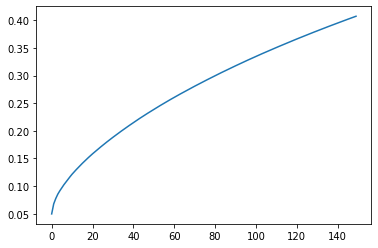

In [24]:
y=[]
cum=0
for v in range(len(v1)):
    cum=cum+v2[v]
    y.append(cum)
y=np.array(y)
plt.plot(y[0:num_i])
plt.show()

In [10]:
# 所有的字詞
len(terms)
print (terms[0:100])

['一一', '一下', '一下下', '一下子', '一不小心', '一个', '一些', '一代', '一件', '一份', '一会', '一位', '一住', '一佔', '一個', '一個一歲', '一個三歲', '一個半', '一個多月', '一個家', '一個月', '一個肚子', '一個雙', '一側', '一入', '一兩個', '一出', '一分', '一分鐘', '一切', '一切都在', '一切都是', '一到', '一刻', '一刻起', '一刻鐘', '一功', '一半', '一卡通', '一口', '一口氣', '一句', '一台', '一向', '一周', '一圈', '一堵', '一塊', '一塵不染', '一夜', '一大', '一大堆', '一大家子', '一大早', '一天', '一套', '一如', '一定', '一家', '一家亲', '一家人', '一家老小', '一宿', '一封', '一封信', '一對', '一小', '一小包', '一层', '一層', '一層樓', '一帶', '一幫', '一年', '一年一度', '一应俱全', '一店', '一度', '一张', '一張', '一應俱全', '一户', '一所', '一扇', '一把', '一探', '一撇', '一支', '一整天', '一旁', '一日遊', '一旦', '一早', '一星', '一晚', '一會', '一會兒', '一月', '一月份', '一本']


In [11]:
def lsa_concept(model_lsa, terms, num_t, num_i):    
    final=[]
    for i, comp in enumerate(model_lsa.T):
        termsInComp=zip(terms,comp)
        # 依重要性 x[1] 排序，取前 num_t名，找尋在每個向度，投影值最大者
        sortedTerms=sorted(termsInComp, key=lambda x: x[1],reverse=True)[:num_t]
        sub_final=[]
        for term in sortedTerms:
             sub_final.append(term[0]+'('+str(round(term[1],2))+')')
        final.append(sub_final)     

    # final 轉置
    final = [[final[j][i] for j in range(len(final))] for i in range(len(final[0]))]
    
    # 概念構成表 
    s = pd.DataFrame(final, index=range(num_t), columns=range(num_i))
    return s

In [27]:
# lsa_tfidf 各字詞在 num_i 個主題空間上的投影 
print ("字詞數", len(lsa_tfidf))
print ("字詞", terms[0])
print ("字詞投影", lsa_tfidf[0])

字詞數 7712
字詞 一一
字詞投影 [ 0.04749252  0.07493448 -0.07779212  0.27933043  0.03794193  0.12623473
  0.01875563  0.06109732  0.0335852  -0.15031377 -0.0037302  -0.01090985
 -0.00357794 -0.08100407 -0.01237096  0.02804445 -0.0285089   0.02341859
 -0.00147318  0.00278109 -0.03424264  0.01479943  0.00170663  0.02363207
  0.01858473  0.0451317   0.00030287  0.00548802 -0.02010761 -0.02252635
  0.04373795  0.00408083 -0.02432916  0.03072798  0.01533098 -0.06576897
 -0.0164337  -0.0453755   0.03034647 -0.00481331 -0.0503479  -0.03470793
 -0.0525197  -0.04418164 -0.06813708 -0.04810173  0.05896101  0.01708018
  0.05180108 -0.05824369 -0.06677069 -0.03408728 -0.00625689  0.02166662
 -0.06311669  0.06739487 -0.02081953 -0.01144588  0.01483095 -0.06041591
  0.08240935  0.01400271 -0.0295798   0.0393517  -0.01828782  0.00407173
 -0.04836268  0.00250452  0.07786289  0.00037696  0.00196908 -0.00377024
  0.01571651  0.02498756  0.00654024 -0.04602782 -0.10756673  0.07203339
 -0.06911394 -0.13411719 -0.104

In [12]:
# lsa_tfidf,num_i 個維度，主要構成的字詞 
num_t=20
df_concept=lsa_concept(lsa_tfidf, terms, num_t,num_i)
df_concept

,0,1,2,3,4,5,6,7,8,9,...,140,141,142,143,144,145,146,147,148,149
0,酒店(0.79),台北(0.63),我們(0.6),房间(0.65),還會(0.49),房间(0.34),天成(0.38),這家(0.4),非常(0.31),近往(0.54),...,電梯(0.32),点赞(0.34),痕跡(0.28),更是如此(0.31),人多(0.37),提到(0.31),不大(0.33),兩台(0.29),一大(0.32),一切(0.29)
1,房間(0.74),飯店(0.54),誰知(0.45),车站(0.65),再來(0.47),服务(0.31),臺北(0.37),酒店(0.34),天成(0.28),非常(0.5),...,心情(0.29),来时(0.3),不太好(0.27),當新(0.31),从台(0.37),修理(0.3),更好(0.33),幹活(0.29),單床(0.3),好会(0.28)
2,臺北(0.63),交通(0.51),只住(0.42),捷运(0.6),下次(0.33),车站(0.31),車站(0.36),長途(0.32),一年(0.28),價位(0.32),...,人氣(0.29),稳定(0.28),水力(0.27),优选(0.27),太远(0.37),上門(0.3),入眠(0.29),麻利(0.29),一天(0.3),站口(0.28)
3,非常(0.62),人員(0.44),一口氣(0.41),服务(0.6),肯定(0.31),热情(0.31),買些(0.32),給你(0.31),近往(0.27),回憶(0.3),...,衣架(0.29),街上(0.28),浴品(0.27),屋内(0.27),拼桌(0.37),不巧(0.3),逛點(0.29),周圍(0.27),兩百多(0.29),太貴(0.26)
4,方便(0.61),親切(0.42),不敢相信(0.41),热情(0.6),小姑子(0.28),飯店(0.3),大酒店(0.32),各個領域(0.31),身上(0.27),轉彎(0.29),...,阿珀利(0.29),週日(0.28),節目(0.27),轻轨(0.27),逛一逛(0.37),后能(0.3),不堪入目(0.28),優勢(0.26),只多(0.29),原來(0.24)
5,我們(0.6),方便(0.41),不順(0.41),旁边(0.56),岳母(0.28),捷运(0.29),之所以(0.31),很贊(0.31),其他人(0.26),乾濕(0.27),...,延長(0.28),特地(0.28),動用(0.26),管理(0.26),过来(0.37),未必(0.3),左岸(0.28),店家(0.26),床贊(0.29),吃過(0.24)
6,一個(0.59),捷運(0.4),交接(0.41),体验(0.54),毫無(0.28),一個(0.29),很優(0.27),從優(0.31),點贊(0.25),分離(0.27),...,心思(0.28),很涼(0.27),四周(0.26),三楼(0.25),運行(0.34),異響(0.3),給定(0.28),假日(0.25),貴出(0.29),中餐廳(0.23)
7,車站(0.58),天成(0.38),以客(0.41),还会(0.53),不但(0.26),整洁(0.28),內有(0.27),戰略(0.3),沒什麼(0.25),古典(0.26),...,下手(0.27),婴儿床(0.27),少數(0.26),红烧肉(0.25),擺設(0.31),积極(0.3),多些(0.28),地理(0.25),輸錯(0.29),一路上(0.23)
8,位置(0.57),地點(0.36),先後(0.41),还有(0.52),中心地帶(0.25),预订(0.28),行時(0.27),女人(0.28),美好記憶(0.25),二樓(0.25),...,入室(0.27),專門店(0.26),床褥(0.26),斯韋(0.25),更是(0.3),耳棉(0.3),房内(0.28),兩年(0.25),出錯(0.29),西式早餐(0.23)
9,乾淨(0.55),下次(0.34),先派(0.41),选择(0.52),牀鋪(0.25),干净(0.27),兩次(0.25),路上(0.28),我還(0.25),大道(0.25),...,則會(0.27),彌撒(0.26),提一提(0.26),洛裏(0.25),順道(0.3),過於(0.3),要是(0.27),一堵(0.24),椅子(0.28),作爲(0.23)


In [13]:
# 篩選字詞，tfidf > crit 者 視需要而定
feature=[]
for t in tfidf:
    a=t.toarray()
    term=[]    
    n=-1
    for v in a[0]:
        n+=1      
        if v>0.1:           
            term.append(terms[n])
    string=' '.join(term)        
    feature.append(string)

In [39]:
# select features 與原始文字 比較
n=0
print (df.token[n])
print ("********")
print (feature[n])

謝謝 天成 大飯店 的 全體同仁 因為 你們 的 努力 才 有 那麼 好 的 住宿 體驗 地點 方便 服務 人員 又 專業 且 體貼 值得 推薦
********
人員 住宿 你們 值得 全體同仁 努力 因為 地點 大飯店 天成 專業 推薦 服務 謝謝 那麼 體貼 體驗


In [14]:
df['feature']=feature

In [21]:
df.to_excel( path +"天成飯店評論斷詞_feature.xlsx") 
#####################################################################
import pandas as pd
df=pd.read_excel(path+"天成飯店評論斷詞_feature.xlsx", index_col=None)
df

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,Unnamed: 0.1.1.1.1,Title,Reviews,token,Rating,Place,Total_Post,Vote,Date_of_Stay,feature
0,0,0,0,0,0,很讚,謝謝天成大飯店的全體同仁，因為你們的努力，才有那麼好的住宿體驗！地點方便、服務人員又專業且體...,謝謝 天成 大飯店 的 全體同仁 因為 你們 的 努力 才 有 那麼 好 的 住宿 體驗 地...,50,no_place,1 篇投稿,no_helpful,2019年10月,人員 住宿 你們 值得 全體同仁 努力 因為 地點 大飯店 天成 專業 推薦 服務 謝謝 那...
1,1,1,1,1,1,地點方便,地點離捷運站近，要去台北景點都方便服務人員熱心，有問題也都能即時解答房間乾淨明亮，設備俱全，...,地點 離 捷運 站 近 要 去 台北 景點 都 方便 服務 人員 熱心 有 問題 也 都 能...,50,no_place,1 篇投稿,no_helpful,2019年10月,乾淨 人員 俱全 即時 台北 問題 地點 安靜 捷運 明亮 景點 服務 熱心 舒適 解答 設備
2,2,2,2,2,2,服務人員態度超好,離火車站、捷運很近櫃檯人員都很親切的幫忙解決問題一個人出來住到這裡真是太好了有機會一定會再來...,離 火車站 捷運 很近 櫃檯 人員 都 很 親切 的 幫忙 解決問題 一個 人 出來 住 到...,50,no_place,3 篇投稿,no_helpful,2019年10月,一個 一定 人員 再來 出來 別人 太好了 幫忙 很近 捷運 推薦 機會 櫃檯 火車站 真是...
3,3,3,3,3,3,推薦大家一家好飯店！,飯店到台北車站（火車、捷運、高鐵）非常便利，只要到台北出差都會選擇天成大飯店。 這是為什麼...,飯店 到 台北 車站 火車 捷運 高鐵 非常 便利 只要 到 台北 出差 都 會 選擇 天成...,50,台灣台北,10 篇投稿,no_helpful,2019年10月,一樣 一點 不然 人員 什麼 入住 兩下 出差 只要 可愛 台北 大力 她點 好吃 幫忙 愉...
4,4,4,4,4,4,休息一下,在臺北過夜一宿，環境舒適，服務人員相當棒，可以為您服務，住在這裏很方便，搭配捷運線想去哪都很...,在 臺北 過夜 一宿 環境 舒適 服務 人員 相當 棒 可以 為 您 服務 住 在 這裏 很...,50,台灣中正區,1 篇投稿,no_helpful,2019年10月,一宿 人員 便利 可以 夜景 捷運 搭配 晚上 服務 火車站 環境 相當 看到 線想 臺北 ...
5,5,5,5,5,5,颱風來襲也不用怕,"天成是台北車站附近的最佳飯店, 不用帶雨傘也可到達車站, 還有便利店在樓下, 完全不用擔心不...","天成 是 台北 車站 附近 的 最佳 飯店 , 不用 帶 雨傘 也 可 到達 車站 , ...",40,香港,532 篇投稿,16 人推薦,2019年9月,不同 不用 今次訂 來台 便利店 到達 多款 天成 完全 實在 床房 必會 擔心 旅行 最佳...
6,6,6,6,6,6,一流的台北洒店,這次已經是第二次入住，服務比上次更佳。職員對旅客有賓至如歸的感覺。在填寫房間意見調查後，職員...,這次 已經 是 第二次 入住 服務 比 上次 更佳 職員 對 旅客 有 賓至如歸 的 感覺 ...,50,香港,135 篇投稿,2 人推薦,2019年9月,上次 入住 十分滿意 回應 填寫 已經 意見調查 感覺 旅客 更佳 服務 第二次 職員 親自...
7,7,7,7,7,7,飯店很美,整體飯店氣氛很好，對於我的請求都細心的為我處理好了，雖然飯店的歷史長遠，但我想這大概是為什麼...,整體 飯店 氣氛 很 好 對於 我 的 請求 都 細心 的 為 我 處理 好 了 雖然 飯店...,50,no_place,4 篇投稿,2 人推薦,2019年9月,什麼 再來 原因 大概 對於 整體 歷史 氣氛 生意興隆 細心 處理 請求 這裡 還會 長遠...
8,8,8,8,8,8,很不錯的酒店,我們在這家酒店住了4天3晚。我們的房間是初級套房。很寬敞，很乾凈，也很安靜。我們住的很舒服，...,我們 在 這家 酒店 住 了 4 天 3 晚 我們 的 房間 是 初級 套房 很 寬敞 很 ...,40,日本,19 篇投稿,7 人推薦,e,一段路 不同 不過 乘坐 出口 初級 台北 套房 安靜 寬敞 強烈推薦 很近 快線 我們 所...
9,9,9,9,9,9,高於我的預期,這家酒店靠近各大交通站台：列車站，巴士站、火車站。。。等等。酒店住宿還包早餐，早餐高於我的預...,這家 酒店 靠近 各大 交通 站台 ： 列車 站 巴士站 火車站 等等 酒店 住宿 還包 早...,50,no_place,21 篇投稿,13 人推薦,e,住宿 列車 台灣 各大 各種各樣 巴士站 整潔 料理 既有 早餐 站台 等等 西式 這家 還...


In [16]:
# documents 為 list 元素為 string
num_i=150    # number of concepts
num_t=10    # number of items shown

doc_list=df.feature  #####################################
# tfidf 加權 ****注意單辭被排除在外
vectorizer2 = TfidfVectorizer(min_df = 1,ngram_range= (0,1) )  
tfidf2 = vectorizer2.fit_transform(doc_list)  

# 字詞文章矩陣，轉置 **** 注意先轉置
tdm_tfidf2=tfidf2.transpose() 

# SVD 降維以後的結果 
svd = TruncatedSVD(num_i, algorithm = 'arpack')   # object    

# 各字詞在各維度上的投影，亦即將字詞變成向量
lsa_tfidf = svd.fit_transform(tdm_tfidf2)  # numpy array  

# 標準化
lsa_tfidf_n2 = Normalizer(copy=False).fit_transform(lsa_tfidf)   

# 字詞的 list
terms=vectorizer2.get_feature_names()   

# 降維後所能解釋的變異
v1=svd.explained_variance_
v2=svd.explained_variance_ratio_
v3=svd.explained_variance_ratio_.sum()
print ('能解釋的變異',v1)
print ('能解釋的變異%',v2)
print ('能解釋的變異%總和',v3)

能解釋的變異 [0.00554399 0.00236902 0.00134563 0.00106138 0.0011079  0.00094375
 0.0008789  0.00086129 0.00083629 0.00077668 0.00076496 0.00075067
 0.000727   0.00071709 0.00070511 0.00068091 0.00067099 0.00065786
 0.00065232 0.00064236 0.00063711 0.0006242  0.00061643 0.00060693
 0.0006019  0.0005795  0.00057939 0.00057584 0.00057344 0.00056226
 0.0005549  0.00054904 0.00054273 0.0005425  0.00053551 0.00052724
 0.00052555 0.00052026 0.00051219 0.00050937 0.00050696 0.00050409
 0.00049536 0.00049328 0.00049166 0.00048549 0.00047983 0.00047637
 0.00047536 0.00046748 0.0004676  0.00046439 0.00046117 0.00045741
 0.00045435 0.00045068 0.00044794 0.00044357 0.00044121 0.00043649
 0.00043337 0.00043205 0.00043032 0.00042678 0.00042304 0.00042103
 0.00042069 0.00041606 0.00041489 0.00041224 0.00040956 0.00040614
 0.00040399 0.00040132 0.00039649 0.00039541 0.000393   0.00039124
 0.00038813 0.00038692 0.00038289 0.00038089 0.00037965 0.00037946
 0.00037877 0.00037637 0.00037401 0.00037354 0.00036957

In [23]:
import numpy as np
def cos_simility(a, b):
    # list 改 array
    x = np.array(a)
    y = np.array(b)
    # 向量長度
    Lx=np.linalg.norm(x)
    Ly=np.linalg.norm(y)
    # cos 值
    cos=round(x.dot(y)/(Lx*Ly),8)
    return cos

def kClosestTerms(k,kw,vectorizer,term_proj): 
    # term序號，例如 "吃飯" 的序號 = 7
    index = vectorizer.vocabulary_[kw]       
    terms=vectorizer.get_feature_names()   
    closestTerms = {}
    for i in range(len(terms)):
        if terms[i]!=kw:        
            closestTerms[terms[i]] = cos_simility(term_proj[index],term_proj[i])

    # 依 dictionary 的 value (即相似性) 排序
    sortedList = sorted(closestTerms , key= lambda l : closestTerms[l])

    # 取前 k個，字詞及相似性
    lis_sorted =sortedList[::-1][0:k]
    lis_sim=[]
    for l in lis_sorted:
        lis_sim.append(closestTerms[l])        

    data=list(zip(lis_sorted, lis_sim))   
    df=pd.DataFrame(data)      
    return df

In [24]:
kClosestTerms(15,"酒店",vectorizer2,lsa_tfidf_n2)

,0,1
0,這家,0.544475
1,臺北,0.430917
2,我們,0.400150
3,通風口,0.378697
4,硬盤,0.378697
5,版本,0.378697
6,燻蒸,0.378697
7,燃氣,0.378697
8,泄漏,0.378697
9,汽油價格,0.378697


In [78]:
kClosestTerms(15,"服務",vectorizer2,lsa_tfidf_n2)

,0,1
0,人員,0.545417
1,預留,0.339758
2,訊問,0.339758
3,訂房並,0.339758
4,簡約,0.339758
5,提前準備,0.339758
6,應對得宜,0.339758
7,官綱,0.339758
8,事前,0.339758
9,上天,0.339758


In [79]:
kClosestTerms(15,"台北",vectorizer2,lsa_tfidf_n2)

,0,1
0,車站,0.582418
1,交通,0.400987
2,飯店,0.375299
3,方便,0.374878
4,天成,0.373665
5,捷運,0.349154
6,各地,0.348353
7,和善,0.334718
8,服務,0.329160
9,大飯店,0.326788


In [80]:
kClosestTerms(15,"交通",vectorizer2,lsa_tfidf_n2)

,0,1
0,台北,0.400987
1,便利,0.368806
2,方便,0.363570
3,推介,0.331337
4,下次,0.331280
5,服務,0.307951
6,飯店,0.302112
7,天成,0.300485
8,真心,0.299348
9,舒適,0.293996


In [81]:
kClosestTerms(15,"早餐",vectorizer2,lsa_tfidf_n2)

,0,1
0,豐盛,0.503364
1,來此,0.391031
2,豐富,0.368949
3,廣泛,0.365297
4,優先,0.362584
5,口味,0.338934
6,也好,0.330311
7,大便,0.321180
8,購物點,0.318816
9,選擇,0.314766


In [82]:
select=['飯店','服務','早餐','交通',"房間","划算","捷運","整潔"]
for s in select:    
    d=kClosestTerms(20,s,vectorizer1,lsa_tfidf_n1)
    d.columns = [s,'weight']    
    if s==select[0]:
        result=d[s].copy()
    else:    
        result = pd.concat([result, d[s]], axis=1)
result    

,飯店,服務,早餐,交通,房間,划算,捷運,整潔
0,想到,人員,自助,方便,乾淨,爆满,近下,禮貌待客
1,的還,想做到,種類,便利,酒店,复古,利用,抑或
2,優惠活動,房間,豐盛,大便,方便,平日,而已,飲店
3,外國人,通知,房間,台北,早餐,春节,高鐵,廣東話
4,不遠處,親切,豐富,之一,非常,黄豆,路癡,都極
5,日子,飯店,西式,下次,車站,茄汁,謝謝您,酒店設備
6,歷史悠久,超乎,品種,熱忱,舒適,早饭,學會,房間
7,附設,方便,水果,推介,一個,含双早,最加,餐房
8,台北,親自,酒吧,服務,我們,只订,方便,色香味
9,真不錯,找路,特色,四通八達,位置,房间,公車,幽雅


In [70]:
select=['飯店','服務','早餐','交通',"房間","划算","捷運","整潔"]
for s in select:    
    d=kClosestTerms(20,s,vectorizer2,lsa_tfidf_n2)
    d.columns = [s,'weight']    
    if s==select[0]:
        result=d[s].copy()
    else:    
        result = pd.concat([result, d[s]], axis=1)
result    

,飯店,服務,早餐,交通,房間,划算,捷運,整潔
0,人員,人員,豐盛,台北,方便,黄豆,高鐵,鄰近
1,台北,台北,選擇,方便,乾淨,茄汁,台北,交通
2,天成,飯店,台北,便利,酒店,早饭,出口,友善
3,親切,親切,交通,下次,燈火管制,含双早,台鐵,台北
4,服務,交通,豐富,服務,不問,爆满,人員,詳細資料
5,交通,車站,服務,飯店,一個,春节,交通,舒適
6,地點,方便,自助,舒適,非常,平日,飯店,尚可
7,舒適,乾淨,不錯,天成,我們,复古,方便,致電
8,入住,早餐,來此,早餐,新穎,震動,公車,吃晚飯
9,車站,還會,乾淨,入住,賽百斯,緊要關頭,親切,都極


In [87]:
result.to_excel( path +"天成飯店評論潛在語意分析.xlsx") 
#####################################################################
import pandas as pd
result=pd.read_excel(path+"天成飯店評論潛在語意分析.xlsx", index_col=None)


結論：使用feature後的結果來看，對於討論早餐部分有提到是自助式的，很豐盛不錯；交通方面則是提到便利、車站、捷運等字眼；而討論划算這件事，主要是提到關於早餐的部分，以及時間像是平日或春節等字眼，應該是在提說有供早餐覺得划算以及因為入住時間不同得到不同價格有不同划算程度的感受。酒店的部分會討論到服務親切，交通地點並且含有推薦等字眼，因此就此來看整體評價是很好的。但整體看來字眼相互重複性很高，很有可能是評論中評論者在各面向都會討論到，因此在做分析時才會出現這樣的情況。

In [86]:
# lsa_tfidf,num_i 個維度，主要構成的字詞 
num_i=150
num_t=20
df_concept=lsa_concept(lsa_tfidf, terms, num_t,num_i)
df_concept.to_excel( path +"天成飯店評論維度分析.xlsx") 
df_concept

,0,1,2,3,4,5,6,7,8,9,...,140,141,142,143,144,145,146,147,148,149
0,酒店(0.57),台北(0.48),房间(0.87),位置(0.37),還會(0.51),人員(0.42),車站(0.36),天成(0.44),早餐(0.54),車站(0.36),...,齊備(0.33),優惠卷(0.34),僅對(0.37),大件(0.32),第一印象(0.35),不过(0.35),靈活(0.36),表扬(0.36),停止(0.4),視圖(0.31)
1,臺北(0.54),交通(0.46),服务(0.8),車站(0.35),再來(0.48),服務(0.39),推薦(0.29),大飯店(0.36),自助(0.32),還會(0.34),...,委屈(0.33),免費送(0.34),巧克力(0.37),照明(0.31),敏捷(0.32),可见(0.35),搞錯(0.33),不够(0.35),考虑周到(0.37),常見(0.29)
2,乾淨(0.52),飯店(0.44),车站(0.78),方便(0.29),下次(0.34),來此(0.3),天成(0.28),選擇(0.33),選擇(0.32),再來(0.3),...,富麗(0.33),嘔心(0.34),標準間(0.37),了還(0.29),踏入(0.32),周末(0.35),出血(0.29),住惯(0.35),网络(0.33),包容(0.25)
3,非常(0.51),人員(0.42),捷运(0.73),清除(0.23),不但(0.28),店家(0.26),僅需(0.27),但還(0.27),擦鞋機(0.28),房間(0.29),...,潔身(0.33),好似(0.34),粉色(0.37),信用(0.29),連連(0.32),年底(0.35),國鐵(0.29),半死(0.35),主动(0.31),出境(0.25)
4,台北(0.51),親切(0.41),不错(0.72),擦鞋機(0.23),肯定(0.27),臨近(0.26),已到(0.26),車上(0.27),一月份(0.28),肯定(0.25),...,當心(0.33),差床(0.34),給力(0.37),健康(0.29),反應(0.3),最合适(0.35),心還(0.29),喷头(0.35),塑料板(0.31),可否(0.25)
5,車站(0.5),地點(0.33),热情(0.72),牀鋪(0.22),一定(0.27),想來(0.25),客服(0.25),著大眾(0.25),多樣化(0.27),成年人(0.24),...,說不過去(0.33),幾杯(0.34),號碼(0.37),幾十塊(0.29),受到(0.3),服务到位(0.35),怕疼(0.29),多么(0.35),後方(0.31),因在(0.25)
6,服務(0.5),捷運(0.32),体验(0.7),管理員(0.22),小姑子(0.26),上天(0.25),極度(0.24),車停(0.25),形式(0.27),再訂(0.24),...,伴手(0.31),怎料(0.34),空调(0.36),挺好吃(0.29),下手(0.29),看中(0.35),有三越(0.29),局促(0.35),機櫃(0.31),寄件(0.25)
7,交通(0.48),態度(0.29),旁边(0.68),乾淨(0.22),岳母(0.26),事前(0.25),很優(0.23),透透(0.25),不錯(0.27),正上方(0.23),...,房內(0.3),成間(0.34),专门(0.33),治安(0.29),入室(0.29),订满(0.35),水聲(0.29),显得(0.35),正下方(0.31),寄出(0.25)
8,位置(0.47),天成(0.28),选择(0.67),友好(0.22),壓力(0.26),官綱(0.25),後來(0.23),不二(0.25),豐盛(0.27),價格便宜(0.23),...,哪個(0.3),污穢(0.34),临时(0.33),知足(0.29),則會(0.29),相当(0.33),睡不着(0.29),极好(0.35),汽車站(0.31),成功(0.25)
9,下次(0.46),入住(0.28),人员(0.66),臺北(0.2),想來(0.26),應對得宜(0.25),乾淨(0.23),之一(0.25),大便(0.26),尚算(0.21),...,交通系統(0.29),渣滓(0.34),优点(0.33),肚子餓(0.29),幾道(0.29),几天(0.33),腳底(0.29),累个(0.35),短途遊(0.31),拜託(0.25)


# 維度分析

19、38、61、69、90維：飯店網路服務。   
(關鍵詞彙: 上網、網絡、互聯網、網路連接)

3、23、59、62、76維：購物目的的討論。
(關鍵詞彙: 購物點、購物、百貨公司、新光、百貨)

8、12、33、57、78、96、113維：飯店衛浴設施。
(關鍵詞彙：詞彙: 乾濕分離、浴盆、衛浴設備、浴缸、淋浴間)

40、44、58、61、63、85、91維：以家庭為單位的出遊，家中有嬰兒或小孩。
(關鍵詞彙: 嬰兒車、兒童玩具、寶寶、孩子、娃娃車)

14、29、59維：商務行程。
(關鍵詞彙: 商務人士、商務旅行)